:TASK 1: Load and Understand the Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("winequality.csv")


In [6]:
df.head()
df.tail()
df.sample(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
500,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6
640,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5
1226,7.5,0.58,0.03,4.1,0.080,27.0,46.0,0.99592,3.02,0.47,9.2,5
506,10.4,0.24,0.46,1.8,0.075,6.0,21.0,0.99760,3.25,1.02,10.8,7
1524,6.0,0.42,0.19,2.0,0.075,22.0,47.0,0.99522,3.39,0.78,10.0,6


TASK 2: Basic Data Inspection

In [5]:
df.columns
df.shape
df.dtypes
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


TASK 3: Missing Values Analysis

In [7]:
df.isnull()
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


TASK 4: Exploratory Data Analysis (EDA)


In [8]:
df['quality'].value_counts()


,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


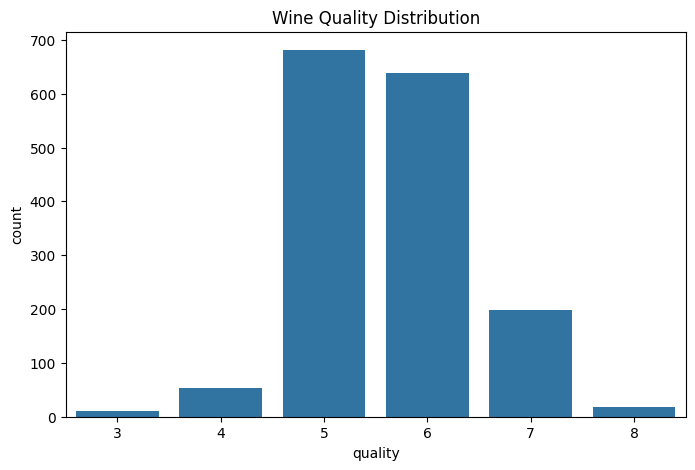

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()


TASK 5: Convert to Binary Classification

In [10]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)


TASK 6: Feature and Target Separation

In [11]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']


TASK 7: Train–Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


TASK 8: Feature Scaling

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


TASK 9: Model Training

In [14]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)


In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [17]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [18]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)


TASK 10: Model Evaluation

In [19]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, svm_pred)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.865625
1,KNN,0.881250
2,Decision Tree,0.871875
3,Random Forest,0.900000
4,SVM,0.875000


TASK 11: Pipeline & Hyperparameter Tuning

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

TASK 12: Final Conclusion

Conclusion

Successfully built a complete ML pipeline

Understood dataset structure and imbalance

EDA revealed quality distribution patterns

Converted problem to practical binary classification

Random Forest performed best

Learned:

Data preprocessing

Model comparison

Scaling importance

Hyperparameter tuning

This project closely mirrors real-world ML systems, where interpretability, robustness, and deployment readiness matter more than just accuracy